In [3]:
# source http://karthur.org/2019/implementing-fixed-effects-panel-models-in-r.html
install.packages('gapminder')
library(gapminder)
data(gapminder)


The downloaded binary packages are in
	/var/folders/tw/j1fhz1vs0hvbqkyjb47bdgc80000gn/T//RtmpWJNHiW/downloaded_packages


In [11]:
print(gapminder[1:20,])

# A tibble: 20 x 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
11 Afghanistan Asia       2002    42.1 25268405      727.
12 Afghanistan Asia       2007    43.8 31889923      975.
13 Albania     Europe     1952    55.2  1282697     1601.
14 Albania     Europe     1957    59.3  1476505     1942.
15 Albania     Europe     1962    64.8  1728137     2

In [4]:
summary(gapminder)

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [9]:
str(gapminder)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1704 obs. of  6 variables:
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...


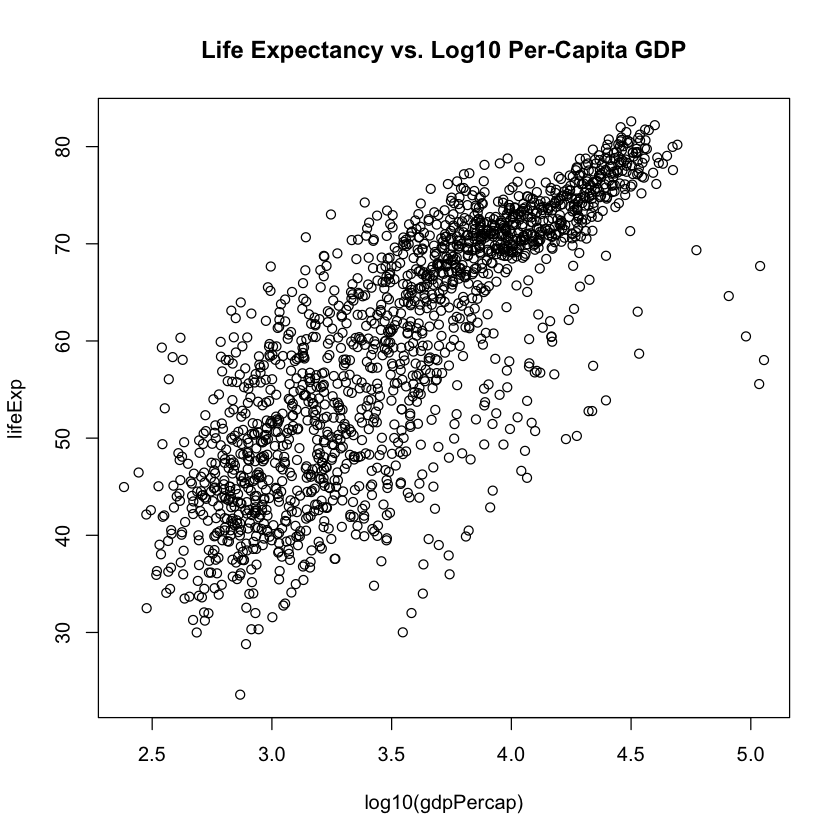

In [5]:
with(gapminder, plot(log10(gdpPercap), lifeExp,
  main = 'Life Expectancy vs. Log10 Per-Capita GDP'))

In [7]:
m1.ols <- lm(lifeExp ~ country + gdpPercap + pop, data = gapminder)
summary(m1.ols)$coefficients[c('gdpPercap', 'pop'),]

,Estimate,Std. Error,t value,Pr(>|t|)
gdpPercap,3.936623e-04,2.973936e-05,13.23708,5.512379e-38
pop,6.196916e-08,4.838246e-09,12.80819,8.746824e-36


now, let's reshape the data to use centered data and no country-level intercepts.

In [8]:
library(dplyr)
gapminder.centered <- gapminder %>%
  group_by(country) %>%
  mutate_at(.vars = vars(year, lifeExp, pop, gdpPercap), .funs = funs('dm' = . - mean(.)))

summary(gapminder.centered$lifeExp_dm)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-20.8647  -4.2138   0.4733   0.0000   4.5696  17.1973 

## We can see from the above that the overall mean, across all subjects, is zero.

In [15]:
m2.ols <- lm(lifeExp ~ gdpPercap_dm + pop_dm,
  data = gapminder.centered)
m2.ols


Call:
lm(formula = lifeExp ~ gdpPercap_dm + pop_dm, data = gapminder.centered)

Coefficients:
 (Intercept)  gdpPercap_dm        pop_dm  
   5.947e+01     3.937e-04     6.197e-08  


In [16]:
# recall in our original model that country was a factor
m1.ols <- lm(lifeExp ~ country + gdpPercap + pop, data = gapminder)

m1.ols


Call:
lm(formula = lifeExp ~ country + gdpPercap + pop, data = gapminder)

Coefficients:
                    (Intercept)                   countryAlbania  
                      3.618e+01                        3.081e+01  
                 countryAlgeria                    countryAngola  
                      1.987e+01                       -1.717e-01  
               countryArgentina                 countryAustralia  
                      2.758e+01                        2.971e+01  
                 countryAustria                   countryBahrain  
                      2.842e+01                        2.228e+01  
              countryBangladesh                   countryBelgium  
                      7.706e+00                        2.902e+01  
                   countryBenin                   countryBolivia  
                      1.189e+01                        1.481e+01  
  countryBosnia and Herzegovina                  countryBotswana  
                      2.992e+01        

In [17]:
# Compare the coefficients
comparison1 <- cbind(
  coef(m1.ols)[c('gdpPercap', 'pop')],
  coef(m2.ols)[c('gdpPercap_dm', 'pop_dm')]
)
comparison1  #coefficients are the same!

gdpPercap,3.936623e-04,3.936623e-04
pop,6.196916e-08,6.196916e-08


In [ ]:
library(lme4)